In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [9]:
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           86785 non-null  int64         
 1   date                                 86785 non-null  datetime64[ns]
 2   country                              86785 non-null  object        
 3   confirmed                            86785 non-null  float64       
 4   deaths                               86785 non-null  float64       
 5   recovered                            86785 non-null  float64       
 6   active                               86785 non-null  float64       
 7   daily_confirmed                      86564 non-null  float64       
 8   daily_deaths                         86564 non-null  float64       
 9   daily_recovered                      86564 non-null  float64       
 10  total_vacc

None

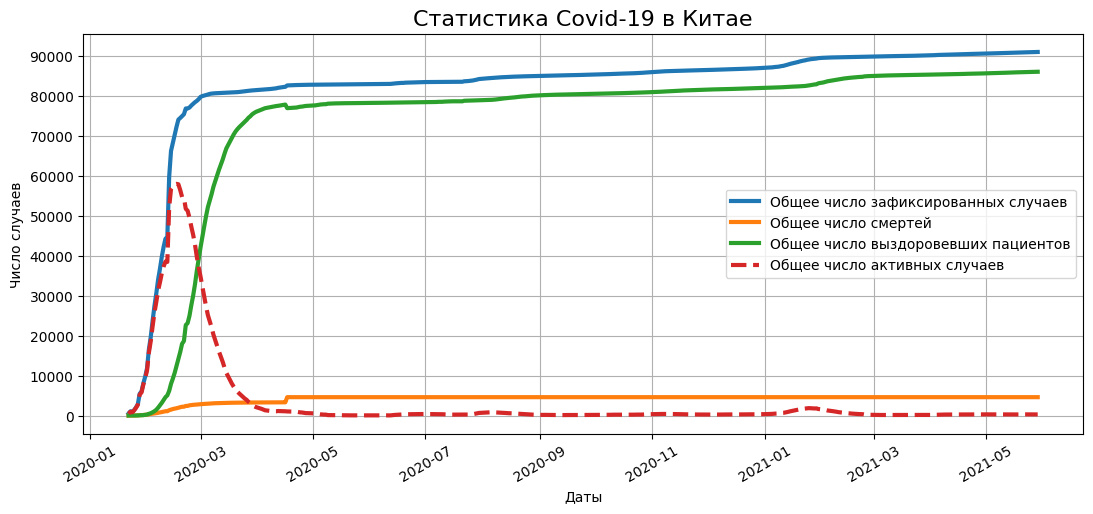

In [10]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();